In [1]:
import sys
sys.path.append("../..") 

In [2]:
import glob,os
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import numpy as np

In [3]:
def get_metrics_from_folder(path,N):
    df_tests = []
    for folder in os.listdir(path):
        if folder.startswith('.') == False:
            pathm = os.path.join(path, folder, "metrics.csv")
            pathp = os.path.join(path, folder, "predictions_0.csv")
            # model name:
            #checkpoint = torch.load(chk_path)
            predictions = pd.read_csv(pathp,nrows=1)
            model_name = predictions.model[0]
            # model results:
            df_metrics = pd.read_csv(pathm)
            df_metrics = df_metrics.tail(1)
            df_metrics.loc[:,'model'] = model_name
            df_metrics.loc[:,'N'] = N
            df_tests.append(df_metrics)
    df_test = pd.concat(df_tests, axis=0)
    return df_test

In [4]:
# args
df1000 = get_metrics_from_folder("../../experiments/sim/data_size_1000/",1000)
df5000 = get_metrics_from_folder("../../experiments/sim/data_size_5000/",5000)
df10000 = get_metrics_from_folder("../../experiments/sim/data_size_10000/",10000)
df_test = pd.concat([df1000,df5000,df10000],axis=0)

In [5]:
df_test

,crps_mean,ig_mean,int_score_mean,var_pit,int_coverage,int_av_width,int_med_width,rmse,step,model,N,val_loss,val_loss_pred,val_loss_update,epoch,lr-Adam,training_loss,pred_loss,update_loss,test_loss
0,0.015974,2.130837,19.641277,0.090702,0.909428,13.863062,12.898180,4.075917,0,Catboost,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,0.021897,1.831346,28.620691,0.085902,0.923534,19.673178,17.777527,5.616154,178,FlowGRUModel,1000,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,-1.831346
103,0.023457,1.722460,32.240017,0.081252,0.921212,23.246967,18.380333,5.896279,269,ODEGRUModel,1000,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN,-1.722460
132,0.020236,1.912883,24.372908,0.080641,0.950856,20.289694,17.922089,5.044039,342,IMODE,1000,NaN,NaN,NaN,49.0,NaN,NaN,NaN,NaN,-1.912883
214,0.022015,1.796478,28.861866,0.096332,0.897727,17.981163,15.990845,5.504479,559,FlowGRUModel,1000,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,-1.796479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.014883,2.225991,18.575022,0.081626,0.935523,14.155255,12.935417,3.815779,0,Catboost,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.029791,1.261256,58.521598,0.015879,0.999924,58.501882,58.368270,5.104755,0,LinearModel,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880,0.016299,2.131498,20.058731,0.078847,0.947825,16.475142,14.196510,4.078606,6800,IMODE,10000,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,-2.131498
637,0.011590,2.501014,13.744855,0.084881,0.940770,11.010619,9.318863,2.981825,4930,ODELSTMModel,10000,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,-2.501014


In [6]:
d = {'LinearModel':'LinearModel',
     'Catboost':'Catboost',
     'GRUModel':'TimeGap-GRU',
     'DecayGRUModel':'Decay-GRU',
     'ODEGRUModel':'ODE-GRU',
     'FlowGRUModel':'Flow-GRU',
     'LSTMModel':'TimeGap-LSTM',
     'ODELSTMModel':'ODE-LSTM',
     'FlowLSTMModel':'Flow-LSTM',
     'IMODE':'IMODE'}

In [7]:
df_test['model_name'] = [d[m] for m in df_test.model]
#df_test['model_name'] = df_test['model'] 

In [8]:
df_test["N1"] = df_test.N / 1000

In [9]:
df_test.ig_mean = -df_test.ig_mean

In [10]:
headline_metrics = ['rmse','crps_mean','int_score_mean','int_coverage']
metric_cols = ['rmse','var_pit','crps_mean','ig_mean','int_score_mean',
               'int_coverage','int_med_width','int_av_width']

In [11]:
df_test.loc[:,headline_metrics + ["model_name","N"]].groupby(["model_name","N"]).agg(["mean","std"])

rmse           crps_mean           int_score_mean  \
                        mean       std      mean       std           mean   
model_name   N                                                              
Catboost     1000   4.085307  0.164930  0.015863  0.000783      20.028592   
             5000   3.865519  0.033635  0.015068  0.000095      18.741842   
             10000  3.804891  0.011728  0.014862  0.000057      18.612899   
Decay-GRU    1000   5.605148  0.043892  0.021993  0.000434      28.261292   
             5000   4.986267  0.067233  0.020047  0.000263      24.726542   
             10000  4.936588  0.016921  0.019972  0.000136      24.672122   
Flow-GRU     1000   5.438919  0.217554  0.021548  0.000709      28.049540   
             5000   4.483619  0.202120  0.017511  0.000674      20.322274   
             10000  4.394539  0.221010  0.017356  0.000686      20.289991   
Flow-LSTM    1000   4.888746  0.874886  0.018894  0.003352      23.382043   
             5000   4.014959  0.357416  0.015374  0.001023      18.358224   
             10000  3.695101  0.251466  0.014522  0.000957      17.290338   
IMODE        1000   5.152298  0.176791  0.020736  0.000727      25.703498   
             5000   4.735182  0.642835  0.018994  0.002766      25.245339   
             10000  4.300316  0.620092  0.017207  0.002749      22.204818   
LinearModel  1000   5.232421  0.186983  0.029978  0.000349      58.487025   
             5000   5.100802  0.020145  0.029801  0.000008      58.623560   
             10000  5.106097  0.028304  0.029813  0.000074      58.563342   
ODE-GRU      1000   5.691721  0.181252  0.022605  0.000753      30.110488   
             5000   6.018185  0.098892  0.018443  0.000686      21.661170   
             10000  6.397712  0.020240  0.019084  0.000391      21.235621   
ODE-LSTM     1000   5.380917  0.605582  0.020898  0.002195      25.974638   
             5000   3.043974  0.025673  0.011759  0.000102      13.998692   
             10000  3.042855  0.075571  0.011825  0.000314      14.010956   
TimeGap-GRU  1000   5.675311  0.171371  0.021684  0.000817      25.842941   
             5000   4.155972  1.191179  0.016311  0.004684      21.042537   
             10000  3.131722  0.030553  0.012230  0.000148      14.402953   
TimeGap-LSTM 1000   5.679669  0.171357  0.021953  0.001109      27.327579   
             5000   3.310262  0.083930  0.012837  0.000464      15.420245   
             10000  3.137002  0.070975  0.012251  0.000290      14.434863   

                             int_coverage            
                         std         mean       std  
model_name   N                                       
Catboost     1000   0.537086     0.915692  0.009224  
             5000   0.150939     0.934578  0.001291  
             10000  0.139602     0.934126  0.001214  
Decay-GRU    1000   1.977037     0.918517  0.027822  
             5000   0.350144     0.932180  0.006286  
             10000  0.055940     0.935976  0.008012  
Flow-GRU     1000   1.204179     0.911629  0.013019  
             5000   0.307042     0.970022  0.003029  
             10000  0.282611     0.976738  0.006519  
Flow-LSTM    1000   5.413861     0.939936  0.030100  
             5000   1.364989     0.969868  0.003385  
             10000  0.779291     0.963540  0.003708  
IMODE        1000   2.286323     0.938241  0.022625  
             5000   3.983031     0.886539  0.009656  
             10000  4.115525     0.917682  0.034177  
LinearModel  1000   0.254178     0.999752  0.000430  
             5000   0.104151     0.999899  0.000087  
             10000  0.061311     0.999924  0.000076  
ODE-GRU      1000   1.844498     0.931602  0.010085  
             5000   0.712431     0.957722  0.008485  
             10000  0.097626     0.957715  0.005427  
ODE-LSTM     1000   4.304216     0.939694  0.030607  
             5000   0.305993     0.931876  0.018294  
             10000  0.511429     0.943628  0.004017  
TimeGap-GRU  1000   2.48

In [12]:
df_test.loc[:,metric_cols + ["model_name","N"]].groupby(["model_name","N"]).agg(["mean","std"])

rmse             var_pit           crps_mean  \
                        mean       std      mean       std      mean   
model_name   N                                                         
Catboost     1000   4.085307  0.164930  0.089576  0.002085  0.015863   
             5000   3.865519  0.033635  0.083347  0.001539  0.015068   
             10000  3.804891  0.011728  0.082506  0.000772  0.014862   
Decay-GRU    1000   5.605148  0.043892  0.088410  0.009477  0.021993   
             5000   4.986267  0.067233  0.084845  0.002623  0.020047   
             10000  4.936588  0.016921  0.083248  0.002842  0.019972   
Flow-GRU     1000   5.438919  0.217554  0.091027  0.005218  0.021548   
             5000   4.483619  0.202120  0.074301  0.001094  0.017511   
             10000  4.394539  0.221010  0.071440  0.005302  0.017356   
Flow-LSTM    1000   4.888746  0.874886  0.083083  0.011435  0.018894   
             5000   4.014959  0.357416  0.072159  0.004648  0.015374   
             10000  3.695101  0.251466  0.075518  0.001025  0.014522   
IMODE        1000   5.152298  0.176791  0.083132  0.005639  0.020736   
             5000   4.735182  0.642835  0.099977  0.002886  0.018994   
             10000  4.300316  0.620092  0.088291  0.011413  0.017207   
LinearModel  1000   5.232421  0.186983  0.016594  0.001333  0.029978   
             5000   5.100802  0.020145  0.015850  0.000099  0.029801   
             10000  5.106097  0.028304  0.015935  0.000167  0.029813   
ODE-GRU      1000   5.691721  0.181252  0.078664  0.002367  0.022605   
             5000   6.018185  0.098892  0.076933  0.003911  0.018443   
             10000  6.397712  0.020240  0.078018  0.002063  0.019084   
ODE-LSTM     1000   5.380917  0.605582  0.082852  0.008996  0.020898   
             5000   3.043974  0.025673  0.087170  0.004836  0.011759   
             10000  3.042855  0.075571  0.083393  0.001389  0.011825   
TimeGap-GRU  1000   5.675311  0.171371  0.092210  0.004795  0.021684   
             5000   4.155972  1.191179  0.096893  0.001628  0.016311   
             10000  3.131722  0.030553  0.085770  0.002258  0.012230   
TimeGap-LSTM 1000   5.679669  0.171357  0.085639  0.004372  0.021953   
             5000   3.310262  0.083930  0.089629  0.007394  0.012837   
             10000  3.137002  0.070975  0.079450  0.004961  0.012251   

                               ig_mean           int_score_mean            \
                         std      mean       std           mean       std   
model_name   N                                                              
Catboost     1000   0.000783 -2.142014  0.033623      20.028592  0.537086   
             5000   0.000095 -2.210717  0.003857      18.741842  0.150939   
             10000  0.000057 -2.223736  0.004431      18.612899  0.139602   
Decay-GRU    1000   0.000434 -1.817866  0.055793      28.261292  1.977037   
             5000   0.000263 -1.911606  0.014813      24.726542  0.350144   
             10000  0.000136 -1.913542  0.005959      24.672122  0.055940   
Flow-GRU     1000   0.000709 -1.830580  0.033725      28.049540  1.204179   
             5000   0.000674 -2.092506  0.029027      20.322274  0.307042   
             10000  0.000686 -2.090306  0.023135      20.289991  0.282611   
Flow-LSTM    1000   0.003352 -2.006009  0.200679      23.382043  5.413861   
             5000   0.001023 -2.225672  0.061019      18.358224  1.364989   
             10000  0.000957 -2.270256  0.058912      17.290338  0.779291   
IMODE        1000   0.000727 -1.877341  0.057332      25.703498  2.286323   
             5000   0.002766 -1.927176  0.171007      25.245339  3.983031   
             10000  0.002749 -2.058626  0.189071      22.204818  4.115525   
LinearModel  1000   0.000349 -1.260141  0.003344      58.487025  0.254178   
             5000   0.000008 -1.260355  0.000698      58.623560  0.104151   
             10000  0.000074 -1.260636  0.001316      58.563342  0.061311   
ODE-GRU      1000   0.000753 -

In [13]:
hue_order = list(d.values())

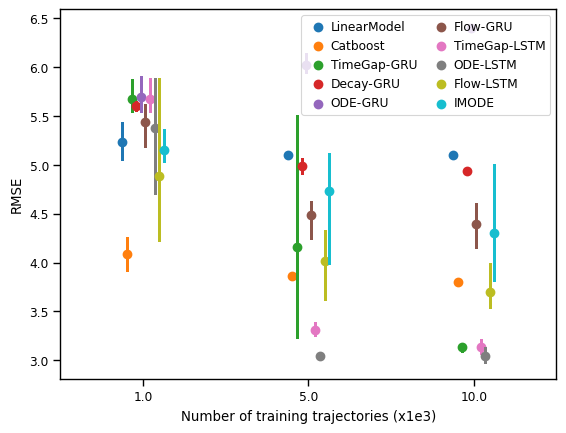

In [14]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.pointplot(x="N1", y="rmse", hue="model_name",hue_order=hue_order,
              data=df_test,dodge=0.25,join=False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="", handletextpad=0, columnspacing=1,
          loc="upper right", ncol=2, frameon=True)
ax.set_xlabel('Number of training trajectories (x1e3)')
ax.set_ylabel('RMSE')
f.savefig('../../results/sim_data_size_rmse2.png', dpi=300)
plt.show()

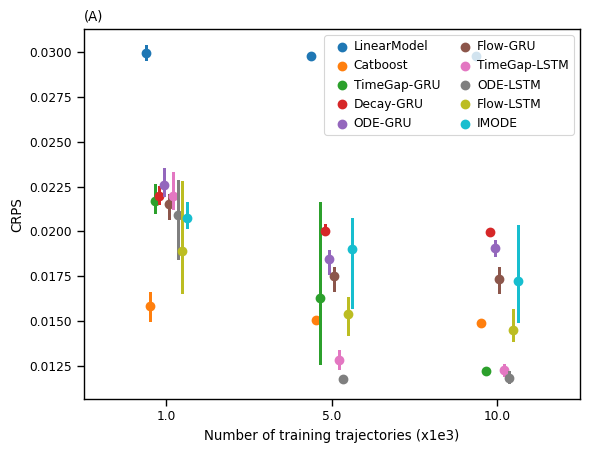

In [15]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.pointplot(x="N1", y="crps_mean", hue="model_name",hue_order=hue_order,
              data=df_test,dodge=0.25,join=False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="", handletextpad=0, columnspacing=1,
          loc="upper right", ncol=2, frameon=True)
ax.set_xlabel('Number of training trajectories (x1e3)')
ax.set_ylabel('CRPS')
ax.set_title('(A)',loc='left')
f.savefig('../../results/sim_data_size_crps2.png', dpi=300)
plt.show()

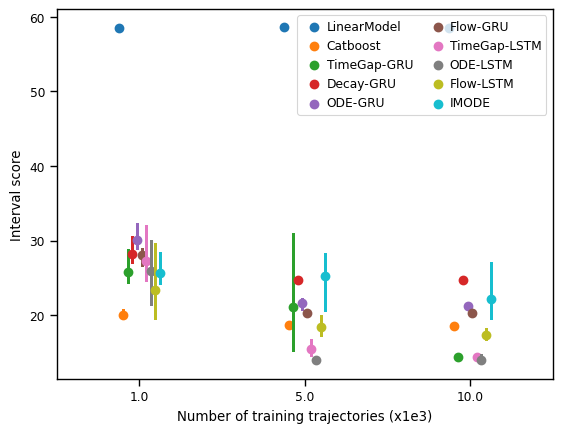

In [16]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.pointplot(x="N1", y="int_score_mean", hue="model_name",hue_order=hue_order,
              data=df_test,dodge=0.25,join=False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="", handletextpad=0, columnspacing=1,
          loc="upper right", ncol=2, frameon=True)
ax.set_xlabel('Number of training trajectories (x1e3)')
ax.set_ylabel('Interval score')
f.savefig('../../results/sim_data_size_int_score2.png', dpi=300)
plt.show()

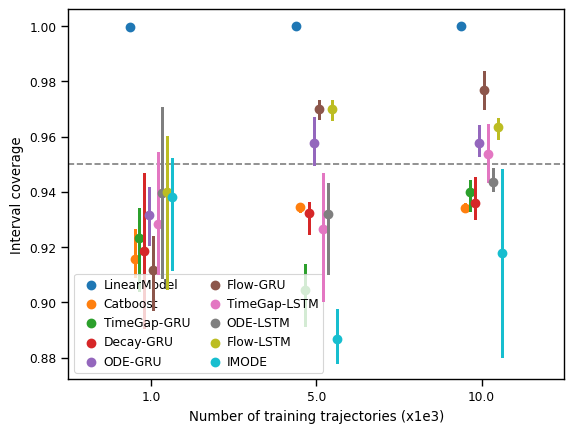

In [17]:
sns.set_context("paper")
f, ax = plt.subplots()
ax.axhline(0.95,ls='--',color="black",alpha=0.5)
sns.pointplot(x="N1", y="int_coverage", hue="model_name",hue_order=hue_order,
              data=df_test,dodge=0.25,join=False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="", handletextpad=0, columnspacing=1,
          loc="lower left", ncol=2, frameon=True)
ax.set_xlabel('Number of training trajectories (x1e3)')
ax.set_ylabel('Interval coverage')
f.savefig('../../results/sim_data_size_int_coverage2.png', dpi=300)
plt.show()

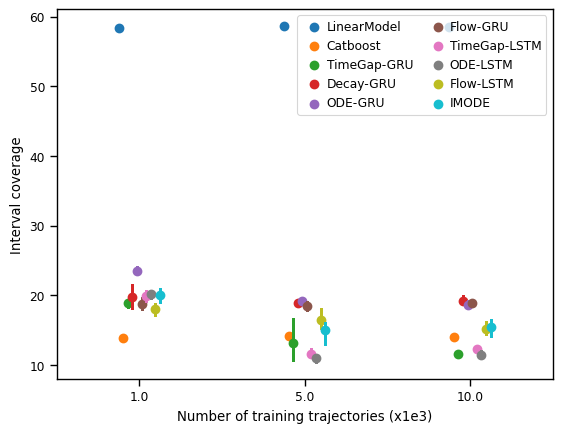

In [18]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.pointplot(x="N1", y="int_av_width", hue="model_name",hue_order=hue_order,
              data=df_test,dodge=0.25,join=False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="", handletextpad=0, columnspacing=1,
          loc="upper right", ncol=2, frameon=True)
ax.set_xlabel('Number of training trajectories (x1e3)')
ax.set_ylabel('Interval coverage')
f.savefig('../../results/sim_data_size_int_coverage2.png', dpi=300)
plt.show()

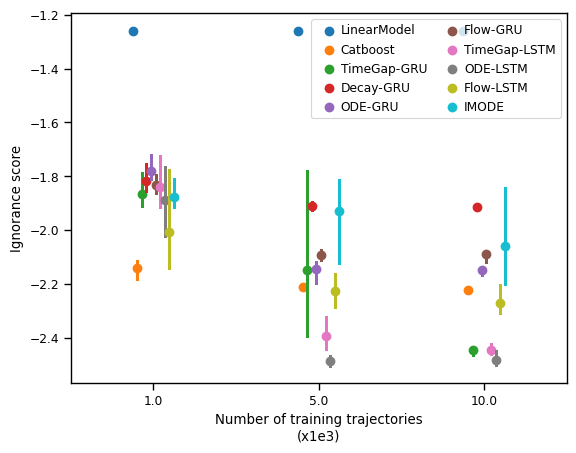

In [19]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.pointplot(x="N1", y="ig_mean", hue="model_name",hue_order=hue_order,
              data=df_test,dodge=0.25,join=False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="", handletextpad=0, columnspacing=1,
          loc="upper right", ncol=2, frameon=True)
ax.set_xlabel('Number of training trajectories\n(x1e3)')
ax.set_ylabel('Ignorance score')
f.savefig('../../results/sim_data_size_ignorance2.png', dpi=300)
plt.show()

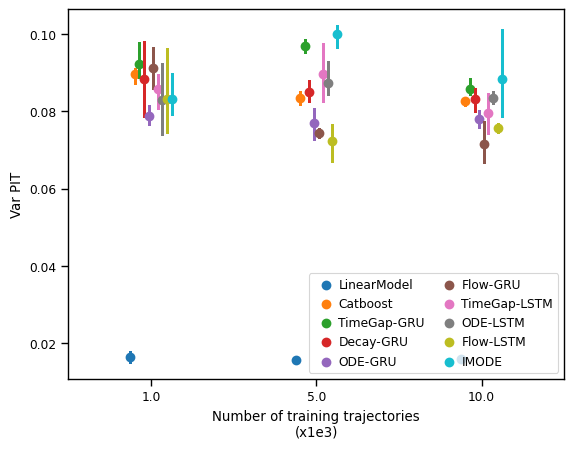

In [28]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.pointplot(x="N1", y="var_pit", hue="model_name",hue_order=hue_order,
              data=df_test,dodge=0.25,join=False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="", handletextpad=0, columnspacing=1,
          loc="lower right", ncol=2, frameon=True)
ax.set_xlabel('Number of training trajectories\n(x1e3)')
ax.set_ylabel('Var PIT')
f.savefig('../../results/sim_data_size_var_pit.png', dpi=300)
plt.show()

In [20]:
import pathlib

def get_val_from_folder(path,N):
    df_tests = []
    for folder in os.listdir(path):
        if folder.startswith('.') == False:
            pathm = os.path.join(path, folder, "metrics.csv")
            pathc = os.path.join(path, folder, "checkpoints/")
            pathp = os.path.join(path, folder, "predictions_0.csv")
            if pathlib.Path(pathc).exists():
                # model name:
                for _, _, files in os.walk(pathc):
                    file = [f for f in files if f.endswith('.ckpt')][0]
                    chk_path = os.path.join(pathc,file)
                predictions = pd.read_csv(pathp,nrows=1)
                model_name = predictions.model[0]
                # model results:
                df = pd.read_csv(pathm)
                df_test = df.loc[:,df.columns.str.startswith('val') | df.columns.str.startswith('epoch')]
                df_test = df_test.dropna()
                df_test.loc[:,'version'] = folder
                df_test.loc[:,'model'] = model_name
                df_test.loc[:,'N'] = N
                df_tests.append(df_test)
    df_test = pd.concat(df_tests, axis=0)
    return df_test

In [21]:
df_val1000 = get_val_from_folder("../../experiments/sim/data_size_1000/",1000)
df_val5000 = get_val_from_folder("../../experiments/sim/data_size_5000/",5000)
df_val10000 = get_val_from_folder("../../experiments/sim/data_size_10000/",10000)
df_val = pd.concat([df_val1000,df_val5000,df_val10000],axis=0)

In [22]:
df_val

,val_loss,val_loss_pred,val_loss_update,epoch,version,model,N
0,2207.016602,305.901093,19011156.0,0.0,version_2,FlowGRUModel,1000
1,2136.282471,255.690521,18805920.0,0.0,version_2,FlowGRUModel,1000
2,2035.709961,183.947006,18517630.0,1.0,version_2,FlowGRUModel,1000
3,1955.272461,126.777512,18284950.0,1.0,version_2,FlowGRUModel,1000
4,1842.590576,46.129444,17964612.0,2.0,version_2,FlowGRUModel,1000
...,...,...,...,...,...,...,...
395,-12456.364258,NaN,NaN,44.0,version_14,GRUModel,10000
398,-11248.673828,NaN,NaN,45.0,version_14,GRUModel,10000
403,-12474.585938,NaN,NaN,45.0,version_14,GRUModel,10000
408,-11962.601562,NaN,NaN,46.0,version_14,GRUModel,10000


In [23]:
df_val['model_name'] = [d[m] for m in df_val.model]

In [24]:
model_N = df_val.loc[:,['model','N']].drop_duplicates().copy()
model_N = model_N.sort_values(['model','N'])
model_N.reset_index(inplace=True,drop=True)
model_N

,model,N
0,DecayGRUModel,1000
1,DecayGRUModel,5000
2,DecayGRUModel,10000
3,FlowGRUModel,1000
4,FlowGRUModel,5000
5,FlowGRUModel,10000
6,FlowLSTMModel,1000
7,FlowLSTMModel,5000
8,FlowLSTMModel,10000
9,GRUModel,1000


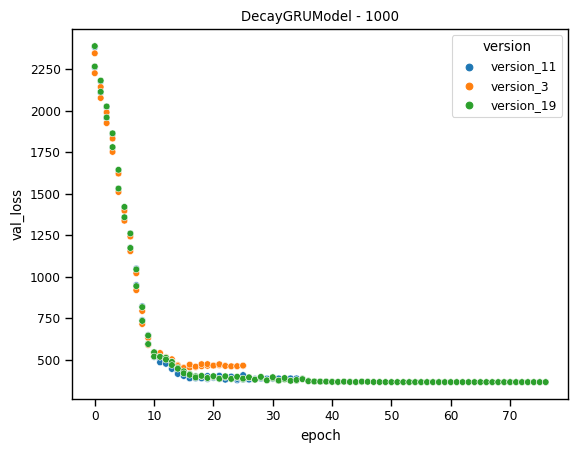

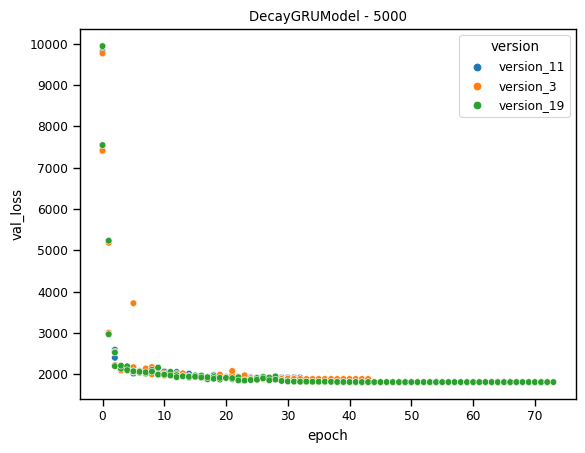

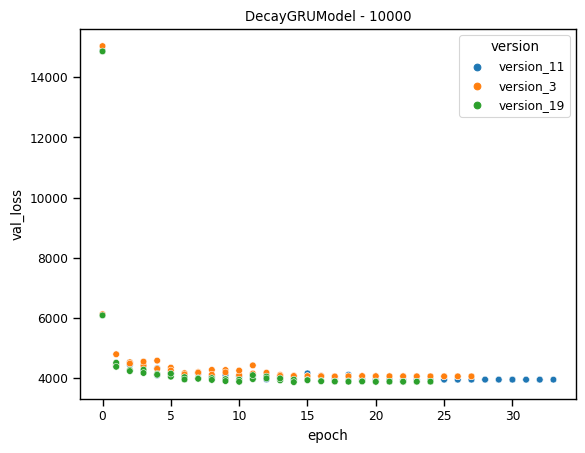

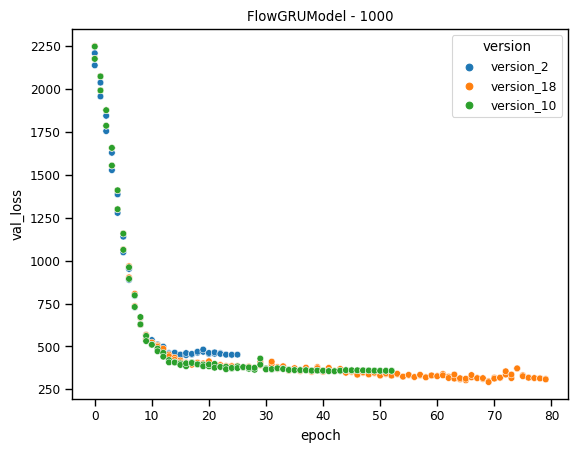

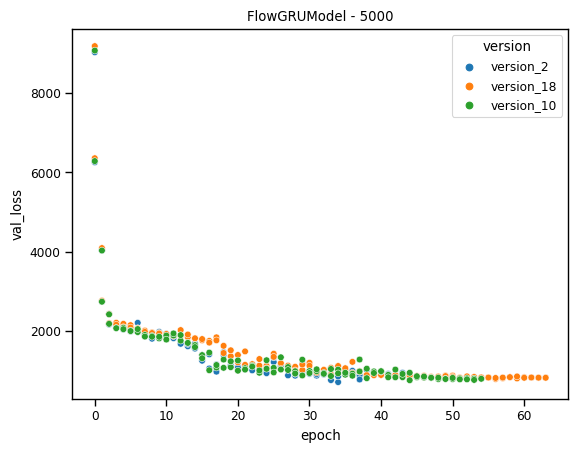

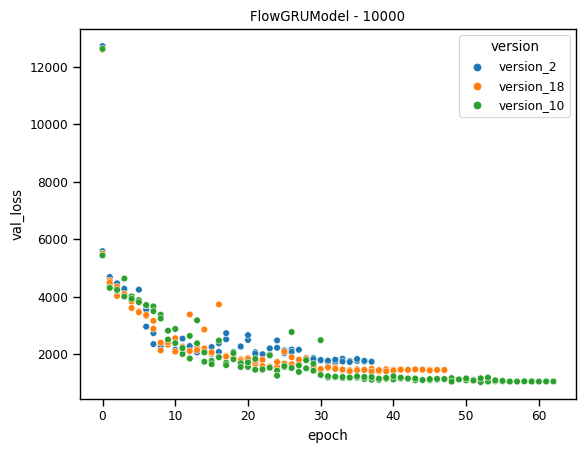

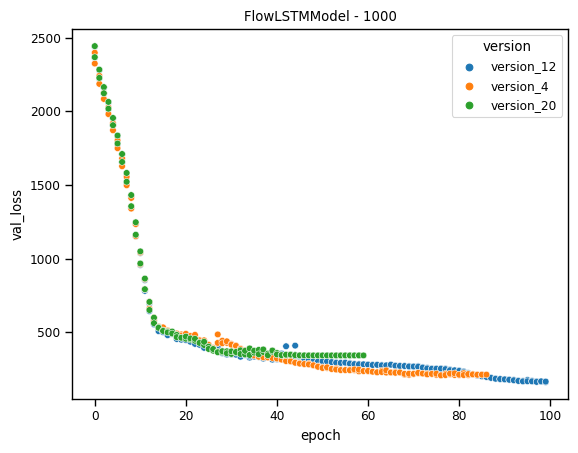

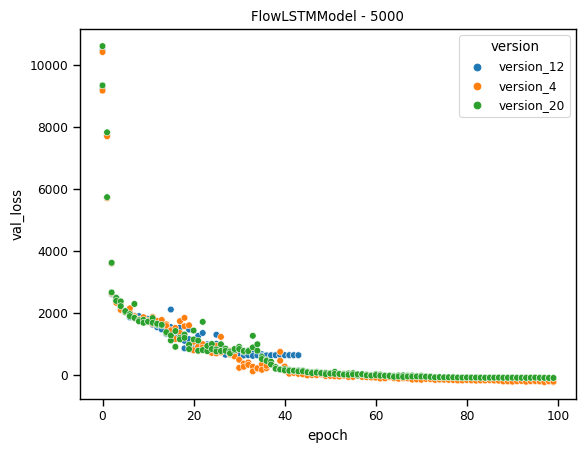

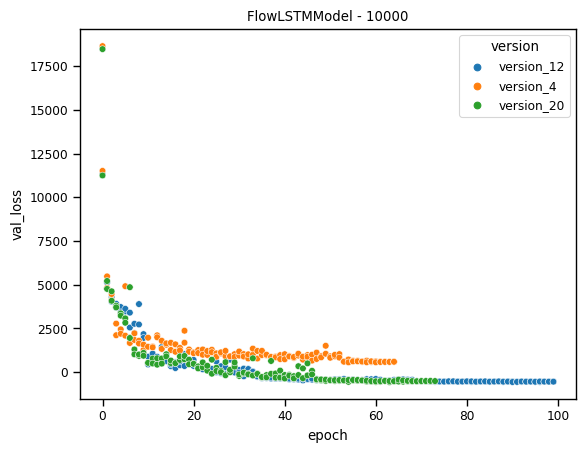

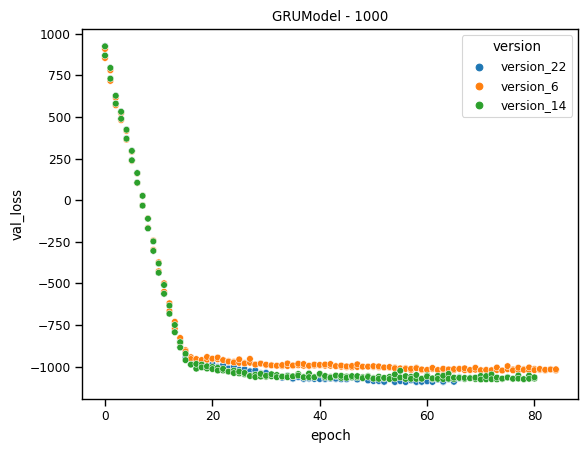

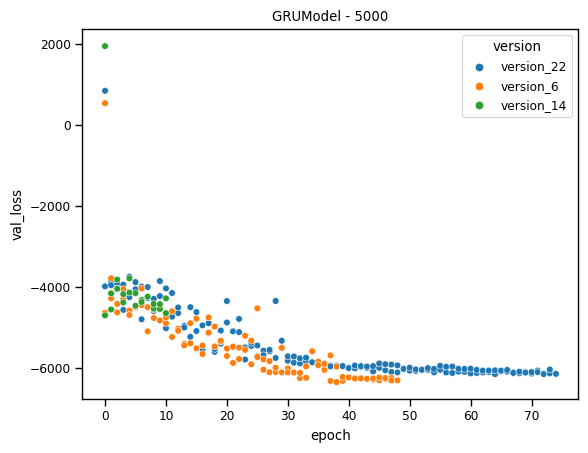

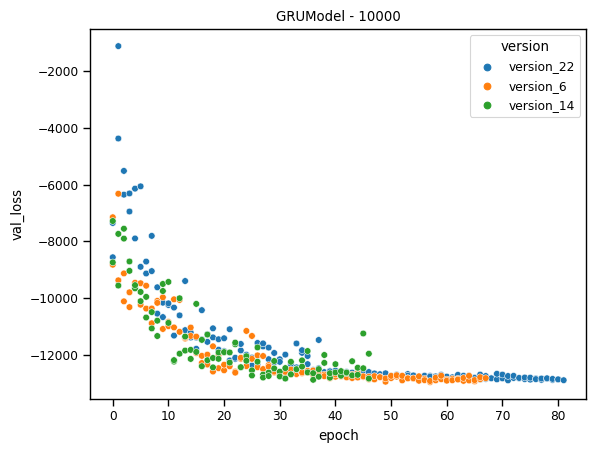

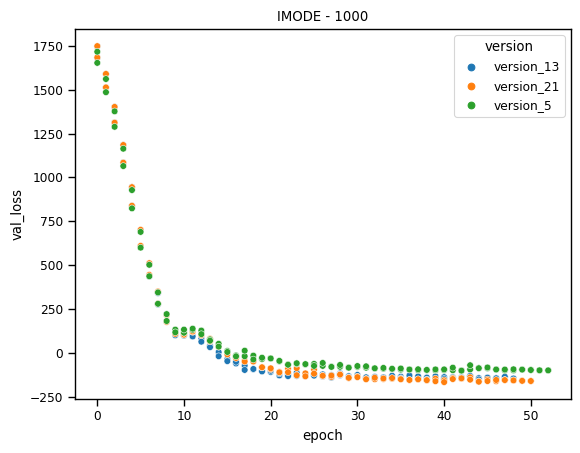

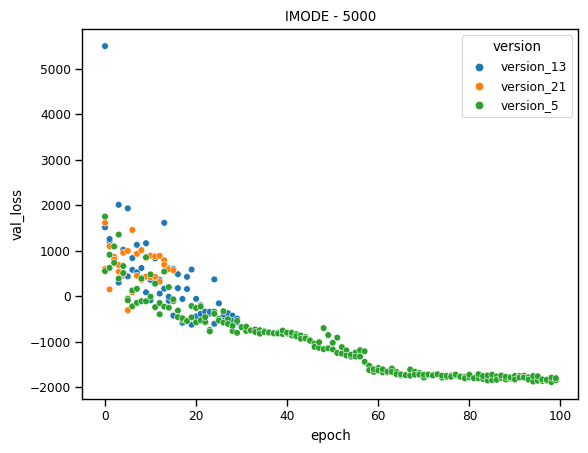

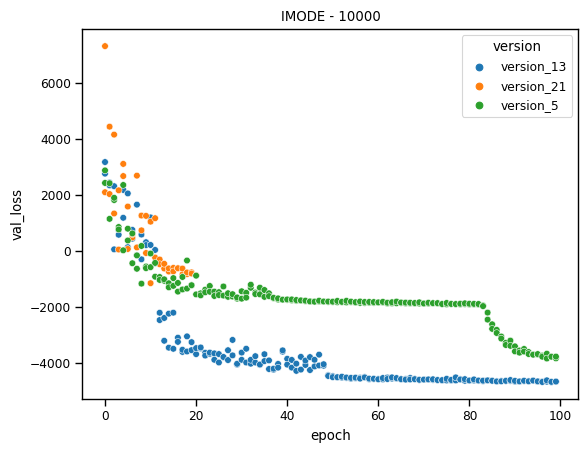

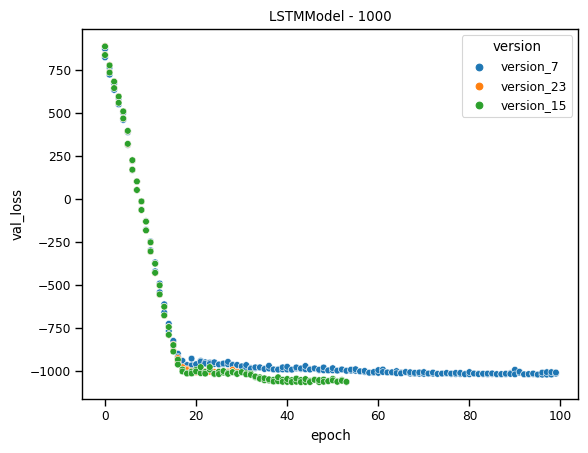

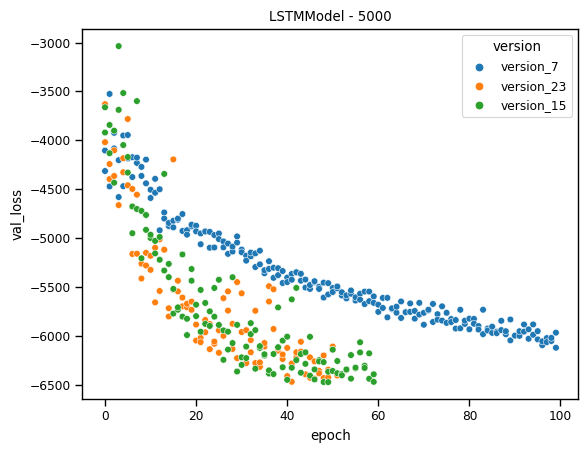

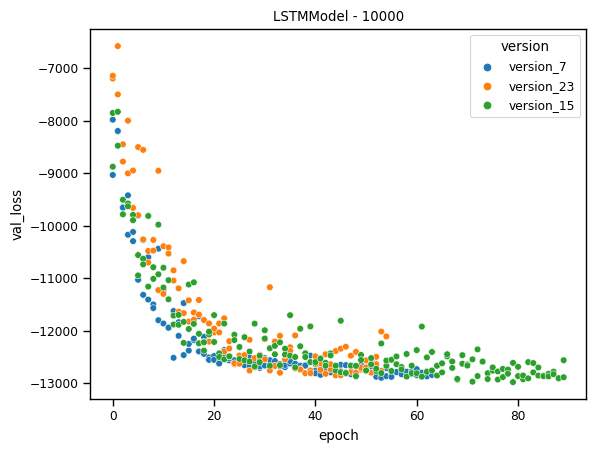

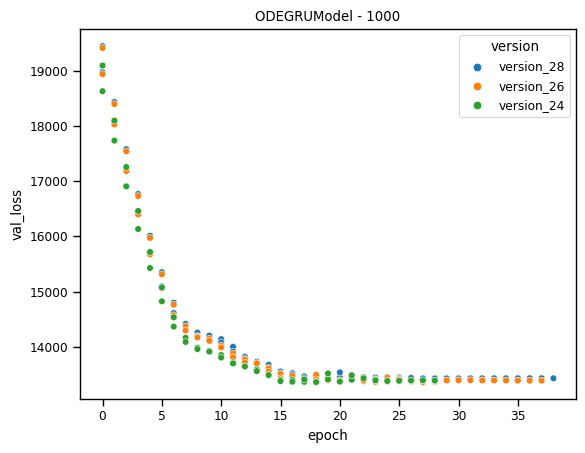

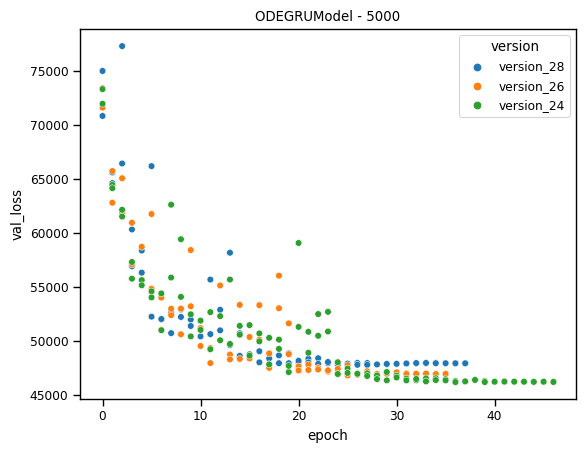

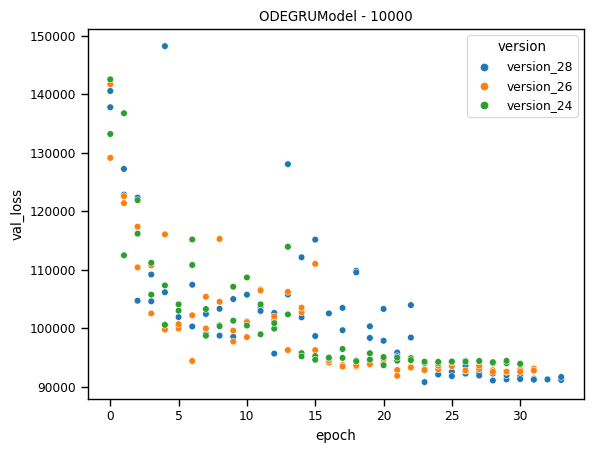

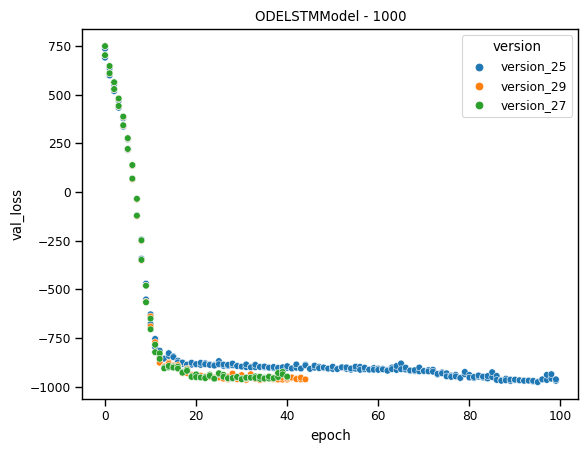

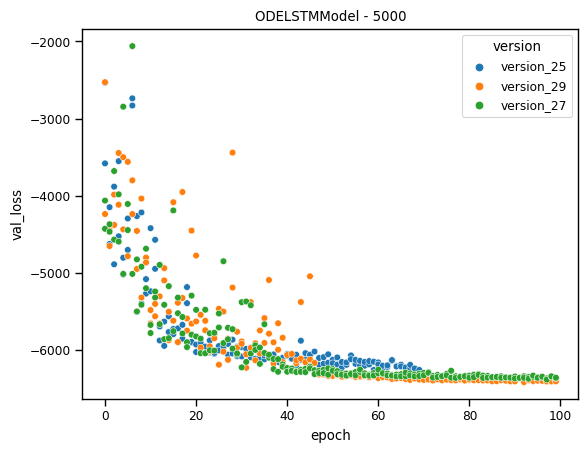

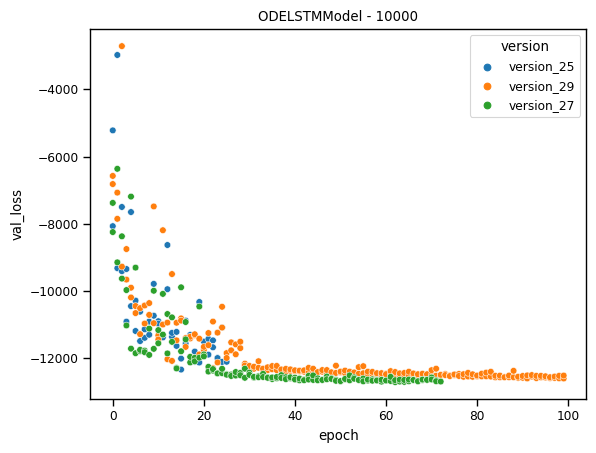

In [25]:
for i in range(model_N.shape[0]):
    df_plot = df_val.loc[(df_val.model == model_N.model[i]) & (df_val.N == model_N.N[i]),:]
    sns.scatterplot(x='epoch',y='val_loss',hue="version",data=df_plot)
    plt.title(model_N.model[i] + " - " + str(model_N.N[i]))
    plt.show()